In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib


# Paso 1: Entendimiento del Negocio

# Paso 2: Entendimiento de los Datos

## Entendiemiento del Dataset de Calificaciones de estudiantes

En esta etapa, exploramos los datos disponibles para comprender su estructura, contenido y calidad.

Hemos obtenido un dataset con las siguientes columnas:

**Sede**= valor categorico del nombre de las sede del colegio
**Estudiante**= nombre completo del estudiante
**Documento de identidad**= docuemtno de identidad del estudiante
**Grado**= 
**Grupo**=
**Periodo**= 
**Año**= 
**Intensidad Horaria**= 
**Asignatura**= 
**Cognitiva**=
**Procedimental**= 
**Actitudinal**= 
**Axiologica**= 


Vamos a explorar los datos para entender mejor su estructura y calidad.

### Análisis Exploratorio de los Datos

In [42]:

# Cargar el archivo Excel
url = 'Calificaciones-2023-2024.csv'
calificaciones_df = pd.read_csv(url)
calificaciones_df.head()


,Sede,Estudiante,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica
0,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Naturales,100,96,96,NaN
1,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Sociales,100,96,96,NaN
2,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Matemáticas,100,100,98,NaN
3,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Lectoescritura,100,100,98,NaN
4,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Inglés,98,97,98,NaN


In [43]:
# Exploramos la estructura del DataFrame (nombre de columnas, tipos de datos y valores nulos)
calificaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24944 entries, 0 to 24943
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sede                    24944 non-null  object 
 1   Estudiante              24944 non-null  object 
 2   Documento de identidad  24944 non-null  object 
 3   Grado                   24944 non-null  object 
 4   Grupo                   24944 non-null  object 
 5   Periodo                 24944 non-null  object 
 6   Año                     24944 non-null  int64  
 7   Intensidad Horaria      22045 non-null  float64
 8   Asignatura              24944 non-null  object 
 9   Cognitiva               24944 non-null  int64  
 10  Procedimental           24944 non-null  int64  
 11  Actitudinal             24944 non-null  int64  
 12  Axiologica              22045 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 2.5+ MB


In [44]:
#se verifica la cantidad de valores null
calificaciones_df.isnull().sum()

Sede                         0
Estudiante                   0
Documento de identidad       0
Grado                        0
Grupo                        0
Periodo                      0
Año                          0
Intensidad Horaria        2899
Asignatura                   0
Cognitiva                    0
Procedimental                0
Actitudinal                  0
Axiologica                2899
dtype: int64

### Conversiones a Realizar
- **Columna `Estudiante`**: Convertida a tipo object y aplicado un hash para anonimizar.
- **Columnas `Documento de identidad`**: Eliminada
- **Valores nulos en columnas `Intensidad Horaria` y `Axiologica`**: se reemplaza null por 'NA' ya ue estos datos estan fantantes en los grados de preescolar


In [45]:
calificaciones_df_trans = calificaciones_df.copy()


# Función para aplicar hash a un valor
def hash_value(value):
    return hashlib.sha256(value.encode()).hexdigest()


In [46]:

# Cambiar columna Estudiante con valores hash
calificaciones_df_trans['Estudiante'] = calificaciones_df_trans['Estudiante'].apply(hash_value)


In [47]:
# eliminar columna
calificaciones_df_trans.drop(columns=['Documento de identidad'], inplace=True)


In [48]:
#cambiar columna Año por variable categorica
calificaciones_df_trans['Año'] = calificaciones_df_trans['Año'].astype('object')

In [49]:
#se realiza en este punto el llenado de datos nulos de variables categoricas  
calificaciones_df_trans['Intensidad Horaria'].fillna(-1, inplace=True)
calificaciones_df_trans['Axiologica'].fillna(-1, inplace=True)

C:\Users\Cathe\AppData\Local\Temp\ipykernel_15156\3443400897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  calificaciones_df_trans['Intensidad Horaria'].fillna(-1, inplace=True)
C:\Users\Cathe\AppData\Local\Temp\ipykernel_15156\3443400897.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [50]:
#se verifica la cantidad de valores null
calificaciones_df_trans.isnull().sum()

Sede                  0
Estudiante            0
Grado                 0
Grupo                 0
Periodo               0
Año                   0
Intensidad Horaria    0
Asignatura            0
Cognitiva             0
Procedimental         0
Actitudinal           0
Axiologica            0
dtype: int64

In [51]:
calificaciones_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24944 entries, 0 to 24943
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sede                24944 non-null  object 
 1   Estudiante          24944 non-null  object 
 2   Grado               24944 non-null  object 
 3   Grupo               24944 non-null  object 
 4   Periodo             24944 non-null  object 
 5   Año                 24944 non-null  object 
 6   Intensidad Horaria  24944 non-null  float64
 7   Asignatura          24944 non-null  object 
 8   Cognitiva           24944 non-null  int64  
 9   Procedimental       24944 non-null  int64  
 10  Actitudinal         24944 non-null  int64  
 11  Axiologica          24944 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.3+ MB


In [52]:

calificaciones_df_trans.head()

,Sede,Estudiante,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica
0,Fusagasugá,8604521f4f3f11a9c673d739d637e2b350d8b0de4d77ce...,Transición,A,III,2023,-1.0,Pre Naturales,100,96,96,-1.0
1,Fusagasugá,8604521f4f3f11a9c673d739d637e2b350d8b0de4d77ce...,Transición,A,III,2023,-1.0,Pre Sociales,100,96,96,-1.0
2,Fusagasugá,8604521f4f3f11a9c673d739d637e2b350d8b0de4d77ce...,Transición,A,III,2023,-1.0,Matemáticas,100,100,98,-1.0
3,Fusagasugá,8604521f4f3f11a9c673d739d637e2b350d8b0de4d77ce...,Transición,A,III,2023,-1.0,Lectoescritura,100,100,98,-1.0
4,Fusagasugá,8604521f4f3f11a9c673d739d637e2b350d8b0de4d77ce...,Transición,A,III,2023,-1.0,Inglés,98,97,98,-1.0


In [62]:
calificaciones_df_trans.columns()

TypeError: 'Index' object is not callable

### Estadísticas Descriptivas

In [53]:
#estadísticas descriptivas sobre las columnas numéricas del df
calificaciones_df_trans.describe()

,Intensidad Horaria,Cognitiva,Procedimental,Actitudinal,Axiologica
count,24944.000000,24944.000000,24944.000000,24944.000000,24944.000000
mean,2.314865,85.049511,84.709229,88.808411,79.646167
std,1.863964,10.523849,10.747573,9.650023,30.436087
min,-1.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.000000,80.000000,80.000000,85.000000,85.000000
50%,2.000000,87.000000,87.000000,90.000000,90.000000
75%,4.000000,92.000000,92.000000,95.000000,95.000000
max,7.000000,100.000000,100.000000,100.000000,100.000000


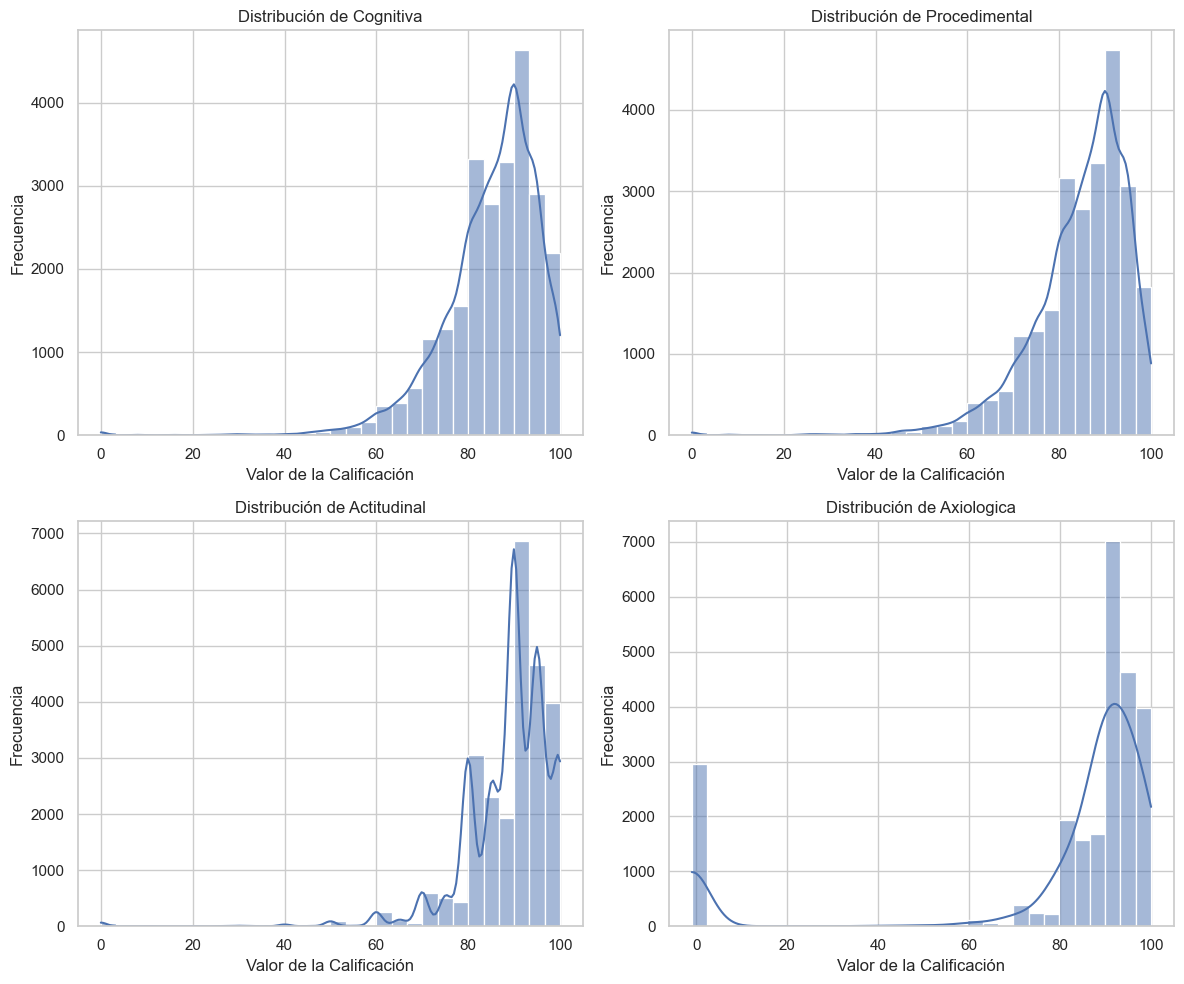

In [60]:
#generamos grafico histograma para entendimiento inicial de los datos

columnas = ['Cognitiva', 'Procedimental', 'Actitudinal','Axiologica']  

# Configurar la cuadrícula de subplots 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Aplanar el arreglo de ejes para iterar más fácilmente
axes = axes.flatten()

for i, columna in enumerate(columnas):
    sns.histplot(calificaciones_df_trans[columna], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {columna}')
    axes[i].set_xlabel('Valor de la Calificación')
    axes[i].set_ylabel('Frecuencia')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


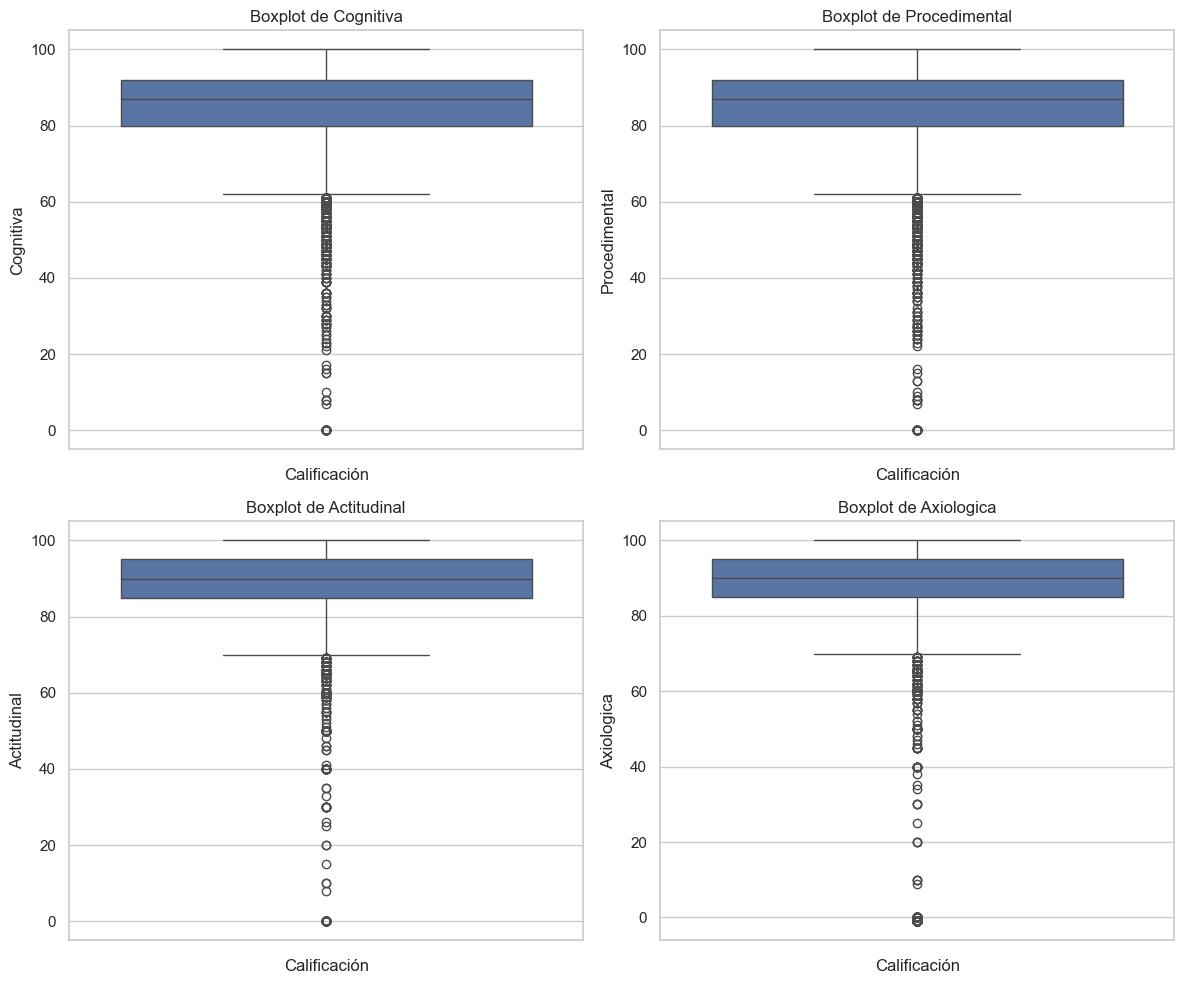

In [61]:
#generamos grafico boxplot para entendimiento inicial de los datos atipicos
columnas = ['Cognitiva', 'Procedimental', 'Actitudinal', 'Axiologica']

# Configurar la cuadrícula de subplots 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Aplanar el arreglo de ejes para iterar más fácilmente
axes = axes.flatten()

for i, columna in enumerate(columnas):
    sns.boxplot(y=calificaciones_df_trans[columna], ax=axes[i])
    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].set_xlabel('Calificación')
    axes[i].set_ylabel(columna)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


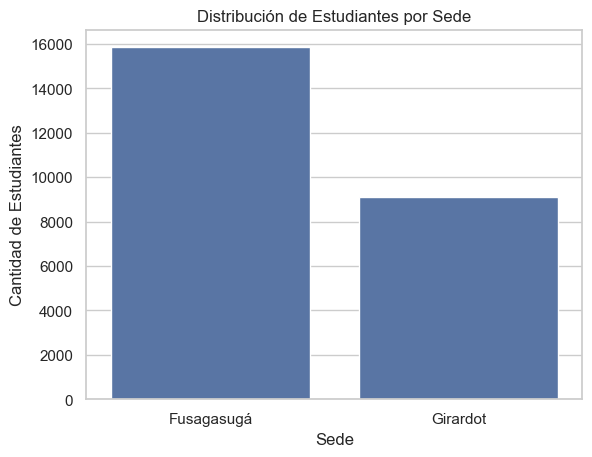

In [63]:
sns.countplot(x='Sede', data=calificaciones_df_trans)
plt.title('Distribución de Estudiantes por Sede')
plt.xlabel('Sede')
plt.ylabel('Cantidad de Estudiantes')
plt.show()

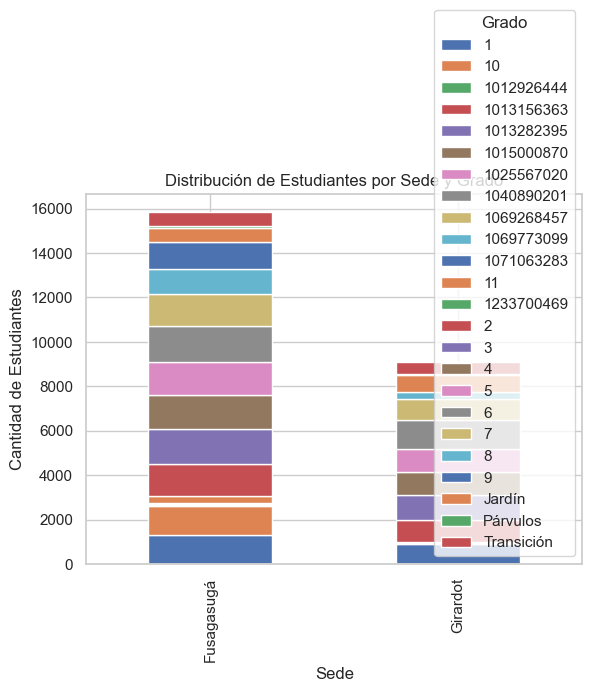

In [64]:
pd.crosstab(calificaciones_df_trans['Sede'], calificaciones_df_trans['Grado']).plot(kind='bar', stacked=True)
plt.title('Distribución de Estudiantes por Sede y Grado')
plt.xlabel('Sede')
plt.ylabel('Cantidad de Estudiantes')
plt.show()